# Machine Learning HACKATHON - Predicting Cardiovascular Disease


| <img src="images/heart.gif" width=300/> | 
|:--:| 
| Is cardiovascular heart disease in your future? |

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


## 1. Problem Definition

To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes. In this case, the problem will be exploring **binary classification**. By evaluating a number of **features** regarding a patient can heart disease be predicted and thus, prevented through healthier lifestyle choices (features). 

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The data source is from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository and part of [iNeuron's Machine Learning Challenge](https://challenge-ineuron.in/mlchallenge.php#) hackathon challenge.

The original database contained 76 attributes, but only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.


## 3. Evaluation

> Given the serious nature of heart disease, a goal of 93% accuracy at predicting whether or not a patient has heart disease must be obtained to continue with the machine learning model. 


## 4. Features

### Heart Disease Data Dictionary


The following are the features to be used for predicting heart disease.

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**No personal identifiable information (PPI) was included in this dataset.**

saved Python dictionary to an external file.

## Preparing the tools

We're going to use [pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) and [NumPy](https://numpy.org/) for data analysis and manipulation along with [Scikit-Learn](https://scikit-learn.org/stable/) and [XgBoost](https://xgboost.readthedocs.io/en/latest/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
import xgboost as xgb

## Load data 

In [2]:
df = pd.read_csv("data/original.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What is the main question(s) to solve?
2. What are the datatypes and how do we treat different types?
3. What's missing from the data and how to deal with it?
4. What about ouliters? Can they be treated?
5. How we apply features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

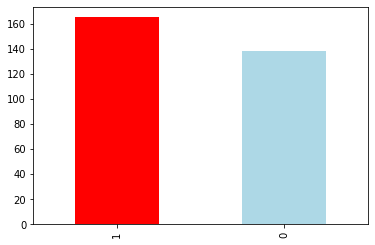

In [6]:
df["target"].value_counts().plot(kind="bar", color=["red", "lightblue"]);

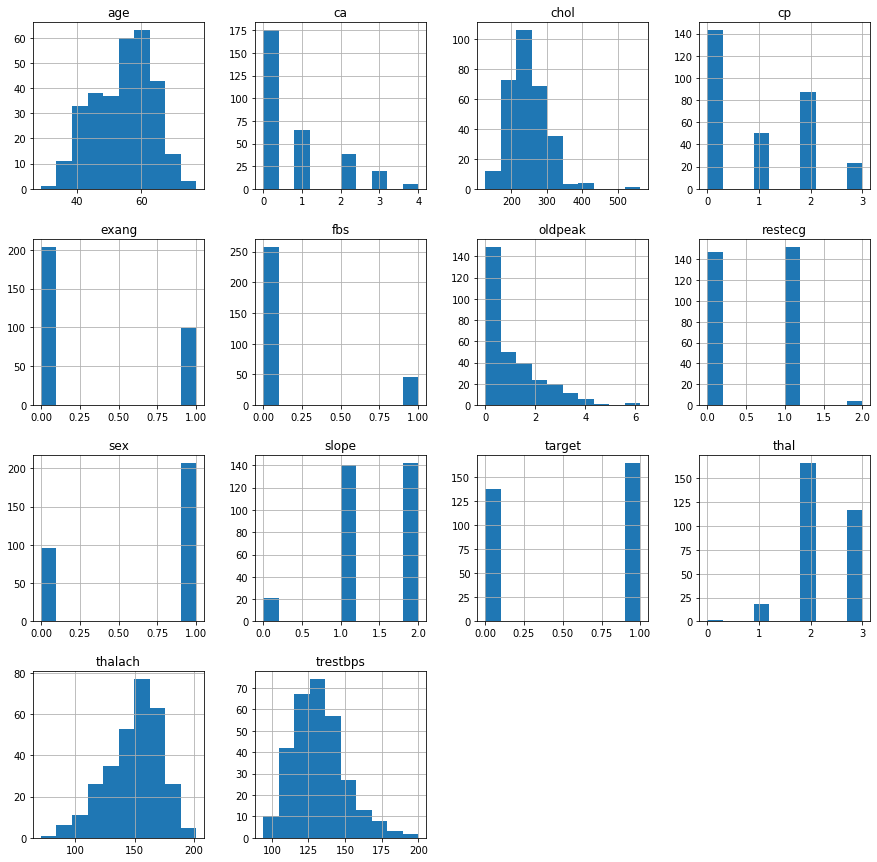

In [7]:
df.hist(figsize=(15,15));

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Given that this dataset is extremely clean with no missing values and every feature being numerical, the emphasis automatically shifts to feature selection for the remainder of this EDA process.

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex 

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


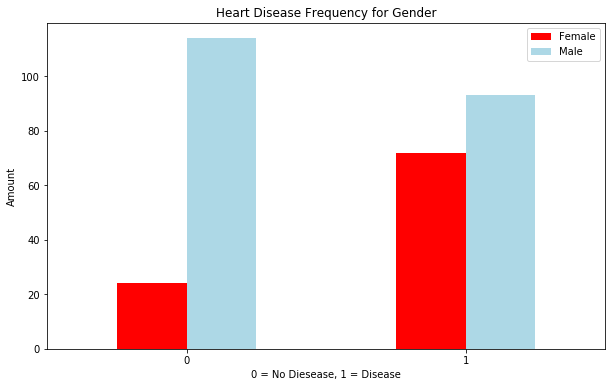

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["red", "lightblue"])

plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [14]:
# sns.catplot("target",data=df,hue="sex",kind="count", height=6, legend=False)
# plt.legend(["Female", "Male"]);

### Age vs. Max Heart Rate for Heart Disease

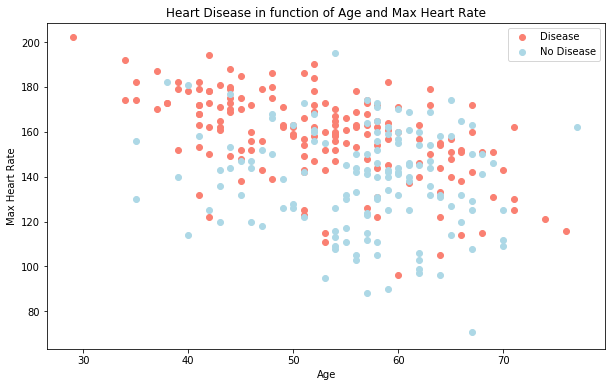

In [15]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

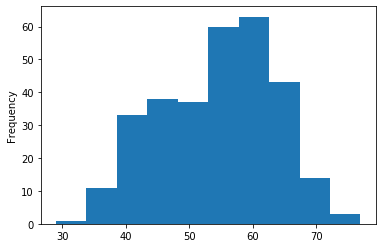

In [16]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

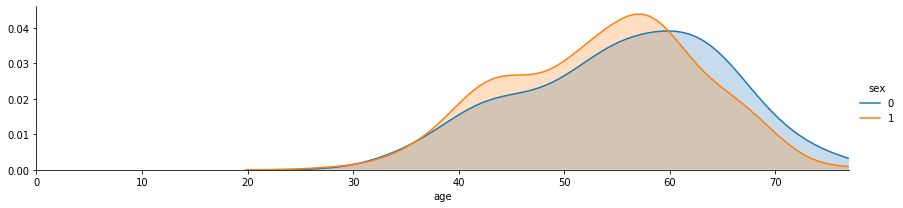

In [17]:
fig = sns.FacetGrid(df,hue='sex',aspect=4)

fig.map(sns.kdeplot,'age',shade=True)

oldest = df['age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend();


The age distribution shows there's a greater distribution of younger <font color=orange>males</font> than younger <font color=blue>females</font>. 

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


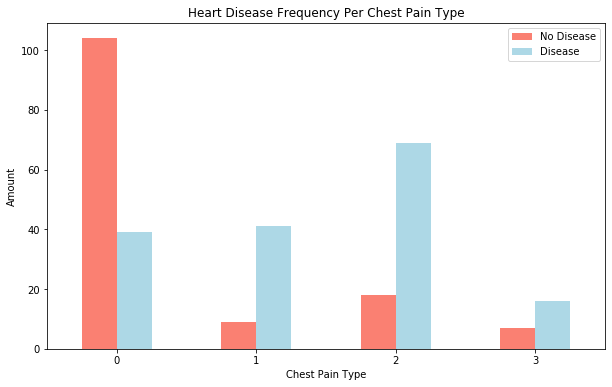

In [19]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [20]:
# sns.catplot('cp',data=df,hue='target',kind='count', height=5);

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Feature Selection through correlation

In [22]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

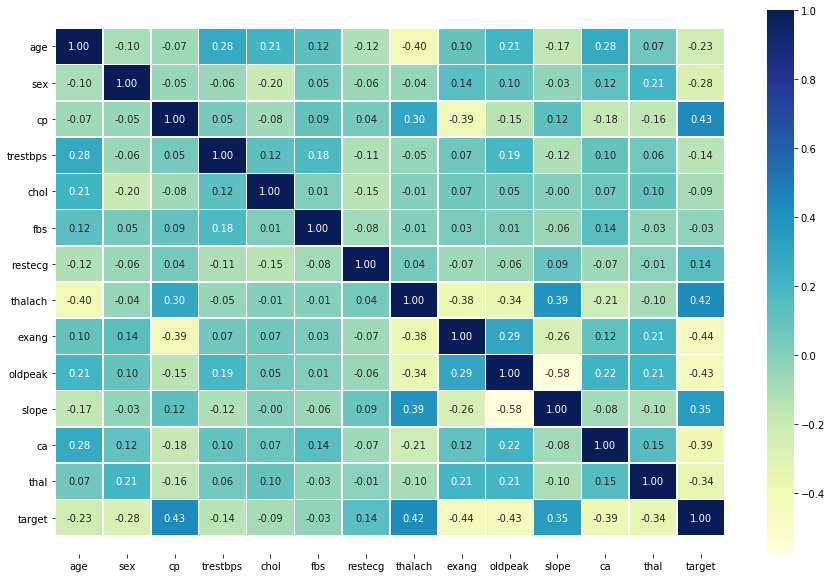

In [23]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Even based on the initial EDA, it was observed that attributes such as `cp` (chest pain) or `thalach` (max heart rate) were strong indicators of a patient's susceptibility to heart disease (target=1). The above correlation matrix confirms the initial analysis along with identifying significant negative correlations `exang` (exercise induced angina) and `ca` (blood vessel condition), which contribute to patient's resistance towards obtaining heart disease issues (target=0).

### Data Preprocessing 
> Categorical values need to be scaled prior to modeling stages. `get_dummies` is a method to create dummy columns for categorical variables.

In [24]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [26]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## 5. Modelling 

In [27]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [28]:
# All attributes in consideration towards target variable (drop y)
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [29]:
# Target variable 
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [31]:
# Split data into train and test sets
np.random.seed(42)

# Split into train (80% data) & test set (20% data)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [32]:
X_train, len(X_train)

(          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
 132 -1.363869 -0.663867  0.941846  0.540209 -0.896862      0      1     0   
 202  0.400752  1.049520  0.458709 -1.690047 -0.206705      0      1     1   
 196 -0.922713  1.049520 -0.294985 -0.115749  2.208842      0      1     0   
 75   0.069886  0.192827  0.072199  0.496478  0.310912      1      0     0   
 176  0.621330 -0.835206 -0.314310  0.452748  0.310912      0      1     1   
 ..        ...       ...       ...       ...       ...    ...    ...   ...   
 188 -0.481558  0.478391 -0.256334  0.583939 -0.379244      0      1     0   
 71  -0.371269 -2.148802 -0.372287  0.190365 -0.896862      0      1     0   
 106  1.613930  1.620649 -0.237008 -0.815437 -0.810592      0      1     0   
 270 -0.922713 -0.663867  0.052874 -0.246940 -0.206705      0      1     1   
 102  0.952197  0.478391 -0.990702  1.283627 -0.896862      1      0     0   
 
      cp_1  cp_2  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  

In [33]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

With the data split into training and test sets, it's time for machine learning algorithm selection based on Classification.

    * Train it (find the patterns) on the training set.
    * Test it (use the patterns) on the test set.

For the sake of implementing multiple models, 4 different classification machine learning models will be used going forward:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. XgBoost Classifier

Set up function to instantiate and fit the models

In [34]:

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XBG Classifier": xgb.XGBClassifier(objective ='reg:logistic')}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [35]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8688524590163934,
 'XBG Classifier': 0.8360655737704918}

`KNN` has the lowest score but I'll look to manually tweak the model by selecting ideal k-neighbors later in this notebook. The other 3 can be ranked as 1. `Logistic Regression` 2. `Random Forest` 3. `XGB Classifier` out of the box without parameter tuning.

### Model Comparison

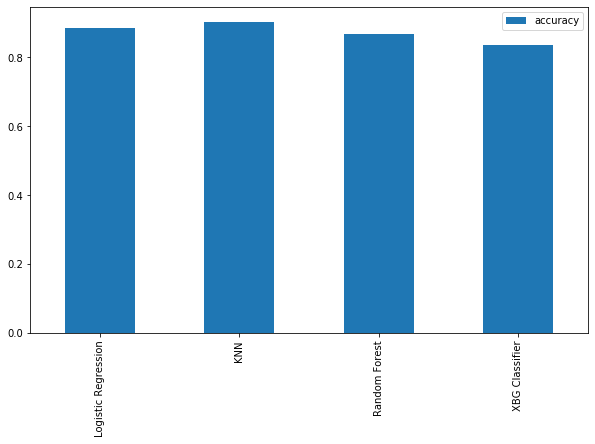

In [36]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(figsize=(10,6));

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand) for `KNN`

In [37]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [38]:
train_scores

[1.0,
 0.871900826446281,
 0.9049586776859504,
 0.8801652892561983,
 0.8760330578512396,
 0.8842975206611571,
 0.8760330578512396,
 0.859504132231405,
 0.859504132231405,
 0.8471074380165289,
 0.8636363636363636,
 0.8471074380165289,
 0.8553719008264463,
 0.8429752066115702,
 0.8181818181818182,
 0.8347107438016529,
 0.8264462809917356,
 0.8181818181818182,
 0.8347107438016529,
 0.8347107438016529]

In [39]:
test_scores

[0.8032786885245902,
 0.819672131147541,
 0.8688524590163934,
 0.8524590163934426,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951,
 0.9180327868852459,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442]

Maximum KNN score on the test data: 91.80%


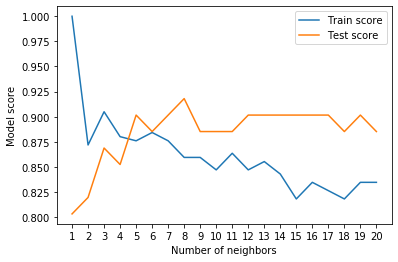

In [40]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

The KNN graph shows a score improvement from `KNN`: 0.6885 to 0.7541 by increasing the default k-neighbors from 5 to 11. The score is still not close to the baseline scores of the other 3 models. 

In [41]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

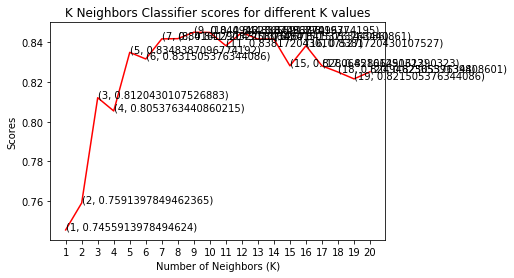

In [42]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red');
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values');

We can drop `KNN` and seek to improve the other 3 models using first RandomizedSearchCV and then the more exhaustive hyperparameter tuning method of GridSearchCV on the chosen model.

## Hyperparameter tuning with RandomizedSearchCV

Hyperparameter tuning of the top 3 models:
* LogisticRegression()
* RandomForestClassifier()
* XGBClassifier()

In [43]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Create a hyperparameter grid for XGBClassifier
xg_grid = {'n_estimators': st.randint(150, 1000),
              'learning_rate': st.uniform(0.01, 0.7),
              'subsample': st.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': st.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

### LogisticRegression

In [44]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1438.44988828766}

In [46]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

### RandomForestClassifier

In [47]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [48]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [49]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

### XgbClassifier

In [50]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
xg_rf = RandomizedSearchCV(xgb.XGBClassifier(objective="reg:logistic"), 
                           param_distributions=xg_grid,
                           cv = 30,  
                           n_iter = 30,
                           scoring = 'roc_auc',
                           error_score = 0,
                           verbose = 3, 
                           n_jobs = -1)
# Fit random hyperparameter search model for RandomForestClassifier()
xg_rf.fit(X_train, y_train)

Fitting 30 folds for each of 30 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   28.3s finished


RandomizedSearchCV(cv=30, error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027C9A659850>,
                                        'max_de

In [51]:
# Find the best hyperparameters
xg_rf.best_params_

{'colsample_bytree': 0.6514619379556374,
 'learning_rate': 0.16313495370114917,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 262,
 'subsample': 0.3584030223980834}

In [52]:
# Evaluate the randomized search RandomForestClassifier model
xg_rf.score(X_test, y_test)

0.9450431034482758

### RESULTS

In [53]:
print('Summary of scores for the 3 models using RandomSearchCV')
print(f'LogisticRegression: {rs_log_reg.score(X_test, y_test)}')
print(f'RandomForestClassifier: {rs_rf.score(X_test, y_test)}')
print(f'**XGBClassifier: {xg_rf.score(X_test, y_test)}**')

Summary of scores for the 3 models using RandomSearchCV
LogisticRegression: 0.8524590163934426
RandomForestClassifier: 0.8688524590163934
**XGBClassifier: 0.9450431034482758**


🎯 The XGBClassifier qualifies for the initial performance measure of 93% evaluation accuracy at predicting whether or not a patient has heart disease. Still not satisfied, let's see how we can improve the model even if only slightly. In the case of predicting heart disease, the accuracy of the model should continually be fine-tuned especially in regards to false-negatives that is not accurately predicting heart disease in a patient when they in fact do. The evaluation metric RECALL specifies the number of false-negatives where a score of 1.0 means the model produced no false negatives. 

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [54]:
# Create a hyperparameter grid for XGBClassifier
xg_grid = {'n_estimators': [i for i in range(150, 1000, 30)],
              'learning_rate': np.arange(0.01, 0.7),
              'subsample': np.arange(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': np.arange(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

# Setup grid hyperparameter search for LogisticRegression
gs_xgboost = GridSearchCV(xgb.XGBClassifier(objective="reg:logistic"),
                          param_grid=xg_grid,
                          scoring = 'roc_auc',
                          error_score = 0,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_xgboost.fit(X_train, y_train);

Fitting 5 folds for each of 812 candidates, totalling 4060 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4060 out of 4060 | elapsed: 11.0min finished


In [55]:
# Check the best hyperparmaters
gs_xgboost.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 150,
 'subsample': 0.3}

In [56]:
gs_xgboost.best_estimator_
# gs_xgboost

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.3, tree_method=None,
              validate_parameters=False, verbosity=None)

In [57]:
# Evaluate the grid search LogisticRegression model
gs_xgboost.score(X_test, y_test)

0.9385775862068966

💾 Save tuned `XGBClassifier()` model 

In [58]:
import pickle

pickle.dump(gs_xgboost, open("gs_xgboost.pkl","wb"))

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [59]:
# Make predictions with tuned model
y_preds = gs_xgboost.predict(X_test)

In [60]:
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

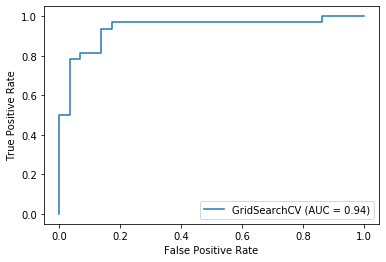

In [62]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_xgboost, X_test, y_test)

The ROC curve plots the true positive rate against the false positive rate at various threshold settings. The AUC score of 0.94 indicates that 94% of the area under the curve is filled where an AUC score of 1.0 would represent a perfect 90 degree elbow at the top-left portion of the curve. 

In [63]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 5 27]]


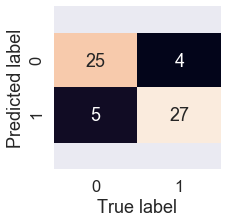

In [64]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Remember earlier regardless of the accuracy score, another goal is to minimize the false-negative rate (predicted label=0 where true label=1) as it implies a patient with a heart disease condition that isn't being treated. In this case, 5 patients fall into the realm of false-negatives. No model is perfect and it's important to investigate how to continue minimizing until the model minimizes the false-negatives rates even further. This can be achieved by reintroducing new features by discussing which features may have lead to the underdiagnoses conditions by speaking to team doctors. 

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [65]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [66]:
# Check best hyperparameters
gs_xgboost.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 150,
 'subsample': 0.3}

In [67]:
# Create a new classifier with best parameters
clf = xgb.XGBClassifier(objective = "reg:logistic", 
                        colsample_bytree = 0.5,
                        learning_rate = 0.01,
                        max_depth = 3,
                        min_child_weight = 1,
                        n_estimators = 150,
                        subsample = 0.3)

In [68]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.80327869, 0.91803279, 0.80327869, 0.85      , 0.8       ])

In [69]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8349180327868853

In [70]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8421117263307932

In [71]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8606060606060607

In [72]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8499194458717527

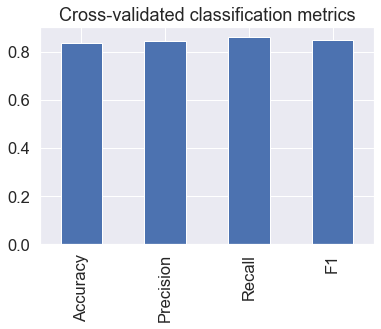

In [73]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance
Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance"

In [74]:
# Fit an instance of LogisticRegression
clf.fit(X_train, y_train);

In statistical analysis of binary classification, the [F score](https://en.wikipedia.org/wiki/F1_score) (also F1-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score. The score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall).

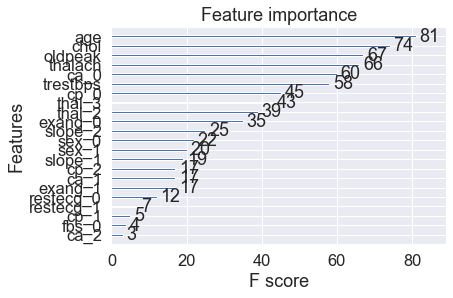

In [75]:
from xgboost import plot_importance
plot_importance(clf);

Identified during EDA, max heart rate, exercised-induced angina, chest pain, cholesterol, and age were all factors in predicting heart disease. The metrics of feature importance indicate a more conclusive look at possible identifying attributes towards predicting the target variable. Invariably, negative correlations can have significant meaning as well especially when considering feature importance. Since xgboost factors decisions based on decision trees and it's hard to identify strong negative correlation in this respect, I'll be using the next most accurate model `logisticRegression()`. 

#### Checking correlations with `LinearRegression()` model

In [76]:
# Check best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1438.44988828766}

In [77]:
# Instantiate best model with best hyperparameters (found with RandomSearchCV)
log_clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

# fit an instance of LogisticRegression
log_clf.fit(X_train, y_train);

# check coef_
log_clf.coef_

array([[ 0.03065248, -0.22945697, -0.08450584,  0.27600953, -0.54132679,
         0.46823478, -0.48098154, -0.77881367, -0.03012617,  0.43800219,
         0.3581909 , -0.13101631,  0.11826955, -0.14440567,  0.15393868,
        -0.02227976,  0.37418707, -0.38693383, -0.05383249, -0.36564724,
         0.40673298,  1.00629603, -0.5079422 , -0.52011126, -0.18447993,
         0.19349061,  0.0164426 ,  0.06529259,  0.49005483, -0.58453677]])

Deciphering the output array, the values determine how much (or litte) each feature contributes to the model's decision making for whether patterns exist in a sample of the patients' health data. Combining the features to the coef_ array allows for depicting and visualizing the feature importances. 

In [78]:
### Match features to columns
features_dict = dict(zip(df.columns, list(log_clf.coef_[0])))
features_dict

{'age': 0.03065247617162429,
 'trestbps': -0.22945696880784916,
 'chol': -0.08450584049329941,
 'thalach': 0.27600952773446596,
 'oldpeak': -0.541326788289001,
 'target': 0.46823478086191495,
 'sex_0': -0.4809815370456856,
 'sex_1': -0.7788136695095387,
 'cp_0': -0.03012617106327016,
 'cp_1': 0.438002186983011,
 'cp_2': 0.3581908974060275,
 'cp_3': -0.1310163073105804,
 'fbs_0': 0.11826955112681169,
 'fbs_1': -0.1444056736241687,
 'restecg_0': 0.1539386821133854,
 'restecg_1': -0.022279764672987735,
 'restecg_2': 0.3741870727844544,
 'exang_0': -0.386933828968224,
 'exang_1': -0.05383249240012072,
 'slope_0': -0.3656472414717202,
 'slope_1': 0.4067329776880703,
 'slope_2': 1.0062960330418,
 'ca_0': -0.5079422040609334,
 'ca_1': -0.5201112648323105,
 'ca_2': -0.18447993246974498,
 'ca_3': 0.19349061213741736,
 'ca_4': 0.016442599411943367,
 'thal_0': 0.06529259051501134,
 'thal_1': 0.49005482570771625,
 'thal_2': -0.5845367718184417}

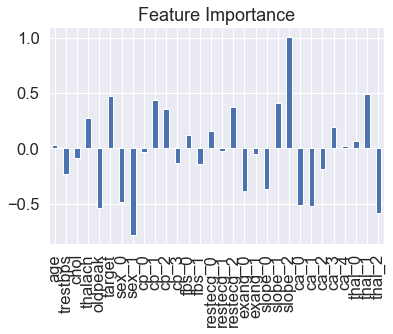

In [79]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

It's now more evident to see that [sex], [exang], [oldpeak], [ca], and [thal] contribute to stronger negative correlations. Features selected from `xgbRegressor()` were accurate for defining the variables that are perceived to influence the decision for the target variable equaling zero or one (heart disease or no heart disease). Again, many of those same features were understood from EDA to measuring the impact of individual features since it's relatively common knowledge that cholesterol, heart rate conditions, exercise, etc. all play a significant factor towards one's susceptibility towards heart conditions. 

## 6. Final Analysis 🌠

Again, many of those same features were understood from EDA to measuring the impact of individual features since it's relatively common knowledge that cholesterol, heart rate conditions, exercise, etc. all play a significant factor towards one's susceptibility towards heart conditions. Even though gender [sex] shows a strong negative correlation, it would require further real-world investigation of why females seem more patients in this particular dataset have underlying heart conditions. The `xgboost` model hits the criteria for limiting false negatives and predicing heart disease with high accuracy.




